Data Science Bootcamp week 3 Assignment

Tanvi Takavane

1.⁠ ⁠Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the dataset

url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"

df = pd.read_csv(url)

In [4]:
df

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
...,...,...,...,...,...,...,...,...,...,...,...,...
16052,06/22/2018 04:00:00 AM,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16053,07/19/2018 06:00:00 AM,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16054,06/16/2018 04:00:00 PM,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16055,07/24/2018 06:00:00 PM,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


<ipython-input-5-63bbe342a363>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


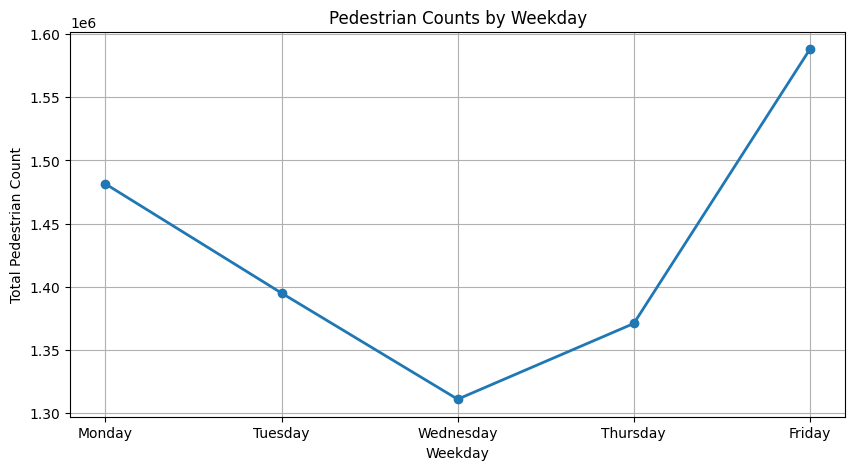

In [5]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

# Extract the day of the week
df['weekday'] = df['hour_beginning'].dt.day_name()

# Filter only weekdays (Monday to Friday)
df = df[df['hour_beginning'].dt.weekday < 5]

# Group by weekday and sum pedestrian counts
weekday_counts = df.groupby('weekday')['Pedestrians'].sum()

# Reorder the index to ensure correct weekday order
weekday_counts = weekday_counts.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])

# Plot the pedestrian counts for each weekday
plt.figure(figsize=(10, 5))
plt.plot(weekday_counts.index, weekday_counts.values, marker='o', linestyle='-', linewidth=2)
plt.xlabel("Weekday")
plt.ylabel("Total Pedestrian Count")
plt.title("Pedestrian Counts by Weekday")
plt.grid(True)
plt.show()


2.⁠ ⁠Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

-This question requires you to show the relationship between a numerical feature(Pedestrians) and a non-numerical feature(Weather Summary). In such instances we use Encoding. Each weather condition can be encoded as numbers( 0,1,2..). This technique is called One-hot encoding.

-Correlation matrices may not always be the most suitable visualization method for relationships involving categorical data points, nonetheless this was given as a question to help you understand the concept better.

<ipython-input-12-6b4c6f05a6cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['hour_beginning'].dt.year


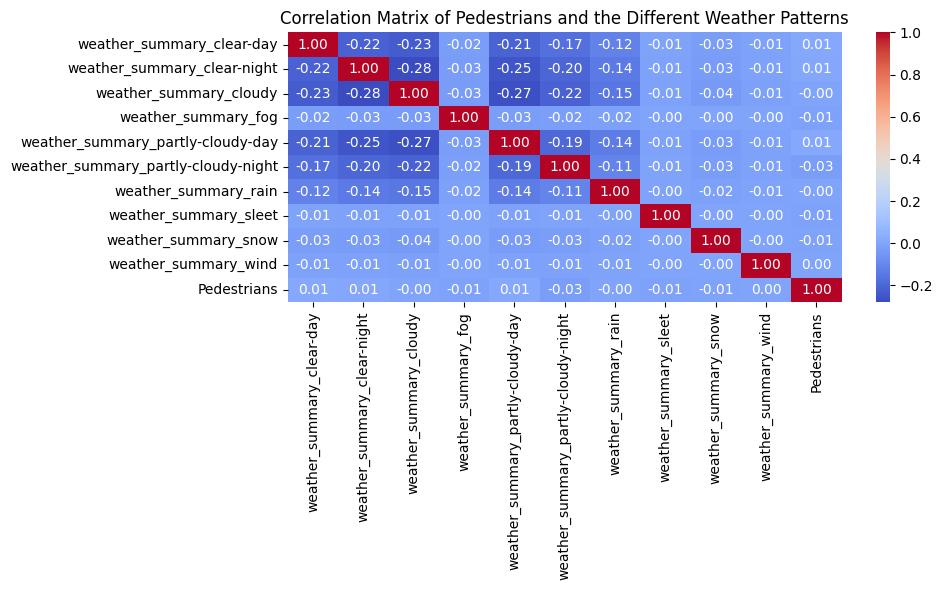

In [12]:
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Separate year into a separate column
df['year'] = df['hour_beginning'].dt.year
year = df[['year', 'Pedestrians', 'weather_summary']]

# Filter for only year 2019
year_2019 = year[year['year'] == 2019]

# Perform one-hot encoding (based on web research)
categorical_columns = year_2019.select_dtypes(include=['object']).columns.to_list()
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(year_2019[categorical_columns])
one_hot_year_2019 = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
year_2019_encoded = pd.concat([year_2019, one_hot_year_2019], axis=1)
year_2019_encoded = year_2019_encoded.drop(categorical_columns, axis=1)

# Creating a correlation matrix
correlation_matrix = year_2019_encoded[['weather_summary_clear-day', 'weather_summary_clear-night', 'weather_summary_cloudy',
                                         'weather_summary_fog', 'weather_summary_partly-cloudy-day', 'weather_summary_partly-cloudy-night',
                                         'weather_summary_rain', 'weather_summary_sleet', 'weather_summary_snow', 'weather_summary_wind', 'Pedestrians']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pedestrians and the Different Weather Patterns')
plt.tight_layout()
plt.show()

Observation: Based on the above results pedestrians counts had greatest positive correlation with partly cloudy weather during the day and strong negative correlation with clear night weather during the night.

3.⁠ ⁠Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

-Students can also show plots analyzing activity.

<ipython-input-14-f6368692b5f2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_of_day'] = df['hour_beginning'].dt.hour.apply(categorize_time_of_day)


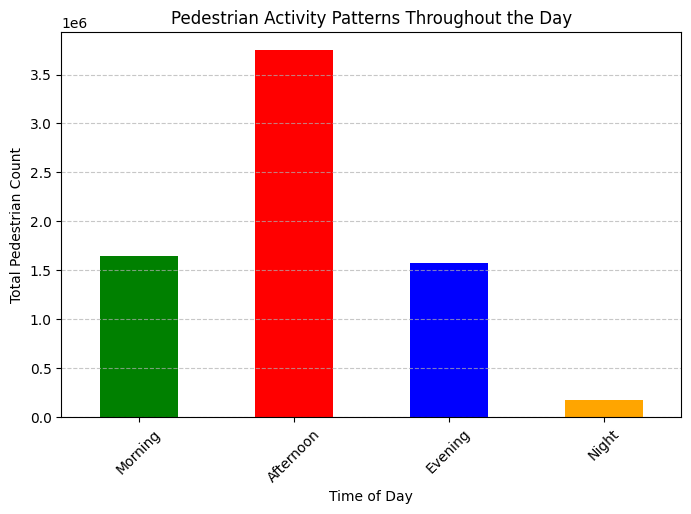

In [14]:
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Apply the function to create a new column
df['time_of_day'] = df['hour_beginning'].dt.hour.apply(categorize_time_of_day)

# Group by time of day and sum pedestrian counts
time_of_day_counts = df.groupby('time_of_day')['Pedestrians'].sum()

# Sort the order for proper visualization
time_of_day_counts = time_of_day_counts.reindex(["Morning", "Afternoon", "Evening", "Night"])

# Plot the pedestrian activity by time of day
plt.figure(figsize=(8, 5))
time_of_day_counts.plot(kind='bar', color=['green', 'red', 'blue', 'orange'])
plt.xlabel("Time of Day")
plt.ylabel("Total Pedestrian Count")
plt.title("Pedestrian Activity Patterns Throughout the Day")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()